# Make a figure of a single pybasin model run

In [14]:
import pickle
import argparse
import os
import sys
import pdb

sys.path.append("..")
import lib.pybasin_figures as pf

## Location of model results file to show in figure

adjust this to point to your own model results file

these are

In [15]:
# file with model results data
model_file = "../model_output/example_dataset_2/model_data_E40_24-10-2025_ms1.pck"

# directory to use if no model file is given
#model_dir = "../model_output/example_dataset_1"

## Figure options

In [16]:
# figure type, choose "png", "pdf", "svg" or "jpg"
fig_type = "pdf"

# option to show provenance history or not
show_provenance_hist = True

# max age to show on burial history panel
# use max_age_burial_panel = None to let the code determine the age by itself
max_age_burial_panel = None

# max age to show on thermochron panels
# use max_age_thermochron_panel = None to let the code determine the age by itself
max_age_thermochron_panel = None

# add astratigraphy column
show_strat_column=True

# add a legend
add_legend=True

# maximum age for the burial hsitory panel
max_age_burial_panel=None



## Show available files in output dir and prompt to select one if no model_file is given

In [17]:
# if model_file is None or model_file == "":
    
#     model_files = os.listdir(model_dir)
#     model_files = [f for f in model_files if f[-4:] == '.pck']

#     model_files_path = [os.path.join(model_dir, mf) for mf in model_files]

#     model_files_path.sort(key=os.path.getmtime)
#     model_files_path = model_files_path[::-1]

#     print('Model data files, sorted from newest to oldest:\n')

#     for i, mf in enumerate(model_files_path):
#         print(i, '\t', os.path.split(mf)[-1])

#     print('enter the number of the file/model run you want to make a figure of:')

#     mfi = int(input())

#     model_file = model_files_path[mfi]

## Read model data file

In [18]:
print(f"reading model datafile {model_file}")

fin = open(model_file, 'rb')
model_run_data_fig = pickle.load(fin)
fin.close()

reading model datafile ../model_output/example_dataset_2/model_data_E40_24-10-2025_ms1.pck


In [20]:
[time_array_bp,
     surface_temp_array, basal_hf_array,
     z_nodes, active_nodes, T_nodes,
     node_strat, node_age,
     T_data, C_data, VR_model_data, AFT_data, AHe_data] = model_run_data_fig

In [21]:
if AHe_data is not None:
	[ahe_sample_depths,
		ahe_ages_all_samples,
		ahe_ages_all_samples_SE,
		ahe_age_bin,
		ahe_age_pdfs,
		modeled_ahe_age_samples,
		modeled_ahe_age_samples_min,
		modeled_ahe_age_samples_max,
		ahe_age_gof, ahe_age_error,
		simulated_AHe_data,
		ahe_data_samples] = AHe_data

In [30]:
modeled_ahe_age_samples, modeled_ahe_age_samples_min

([array([[7.2690131 , 7.2690131 , 7.30420384, 7.30465038],
         [5.49073275, 5.49073275, 5.52196566, 5.52236215],
         [6.92065196, 6.92065196, 6.94440793, 6.94470916],
         [8.48827543, 8.48749533, 8.51604984, 8.51638878],
         [7.22460509, 7.22460509, 7.25833514, 7.25876311]])],
 [array([7.2690131 , 5.49073275, 6.92065196, 8.48749533, 7.22460509])])

In [34]:
import numpy as np

np.min(np.array(modeled_ahe_age_samples_min), axis=1)

array([5.49073275])

## Make figure and save as file

/Users/elco/published_code/pybasin_git/notebooks/../lib/pybasin_figures.py:1100: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  cax_bottom = axhf.get_position().y0 + cb_buffer_vert


making a figure of the model results:
adding panel for AHe data
gridding T or salinity data vs time
strat units shown in fig:
+OSM
+OMM
+USM
USM
[]
[ 0. 20.]
[ 0. 50.]
saving figure as ../model_output/example_dataset_2/model_data_E40_24-10-2025_ms1_figure.pdf
done


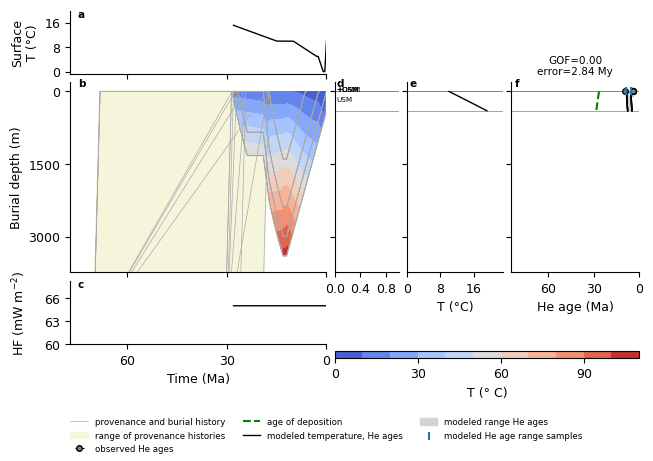

In [42]:
import importlib as imp
imp.reload(pf)

print("making a figure of the model results:")
fig = pf.model_vs_data_figure(model_run_data_fig, show_provenance_hist=show_provenance_hist, max_age_burial_panel=max_age_burial_panel, show_strat_column=show_strat_column, add_legend=add_legend,
                              max_age_thermochron_panel=max_age_thermochron_panel)

fn_out = model_file[:-4] + f"_figure.{fig_type}"

print(f"saving figure as {fn_out}")
fig.savefig(fn_out, dpi=300)

print("done")